1.1 The Clique Functions in the Ising Model

In [1]:
#Computer Exercise 1
import numpy as np
def G(row_s: np.ndarray, Temp: float):
    return np.exp(np.sum(row_s[:-1] * row_s[1:]) / Temp)
 


In [2]:
#Computer Exercise 2

def F(row_s: np.ndarray, row_t: np.ndarray, Temp: float):
    return np.exp(np.sum(row_s * row_t) / Temp)


1.2 Brute Force on Small Lattices
Some of the computer exercises in this section require you to use an absurd
number (from a programmer’s perspective) of nested loops. Thus, you can
(but do not have to) exploit Python’s itertools module to make this a bit more
elegant.
compute ZTemp (for three different values of Temp where Temp ∈ {1, 1.5, 2})
using brute force (use 4 nested For loops, one for each of the xs’s, the looping
is done over the values that xs can take: {−1, 1}). To help you debug: For
Temp = 1, your result should be ZTemp = 121.23 . . ..

In [3]:
#Computer Exercise 3
from itertools import product

def compute_ZTemp1(Temp: float):
    Z = 0
    vals = [-1, 1]

    for x11 in vals:
        for x12 in vals:
            for x21 in vals:
                for x22 in vals:
                    Z += np.exp((x11*x21+ x12*x22 + x11*x12 + x21*x22)/Temp)

    return Z

temp = [1,1.5,2]
for i in temp:
    z = compute_ZTemp1(i)
    print(z)
    

121.23293134406595
40.922799092745386
27.048782764334526


In [4]:
#Computer Exercise 4

import numpy as np

import numpy as np

def compute_ZTemp2(Temp: float):
    Z = 0
    vals = [-1, 1]

    for x11 in vals:
        for x12 in vals:
            for x13 in vals:
                for x21 in vals:
                    for x22 in vals:
                        for x23 in vals:
                            for x31 in vals:
                                for x32 in vals:
                                    for x33 in vals:
                                        energy = x11*x21 + x12*x22 + x13*x23 + x21*x31 + x22*x32 + x23*x33 + x11*x12 + x12*x13 + x21*x22 + x22*x23 + x31*x32 + x32*x33
                                        Z += np.exp(energy/Temp)

    return Z




temp = [1,1.5,2]
for i in temp:
    z = compute_ZTemp2(i)
    print(z)

365645.74913577037
10565.421983514265
2674.518123060087


In [5]:
# computer exercise 5

def y2row(y, width=2):
    """
    y: an integer in (0,...,(2**width)-1)
    """
    if not 0 <= y <= (2 ** width) - 1:
        raise ValueError(y)
    my_str=np.binary_repr(y,width=width)
    # my_list = map(int,my_str) # Python 2
    my_list = list(map(int,my_str)) # Python 3
    my_array = np.asarray(my_list)
    my_array[my_array==0]=-1
    row = my_array
    return row

def compute_ZTemp3(Temp: float):
    Z = 0
    ys = [0,1,2,3]
    rows = []
    for y in ys:
        rows.append(y2row(y, width=2))                       # convert to row vectors  

    rows = np.asarray(rows)                                  # convert to numpy array
    
    for y1 in rows:
        for y2 in rows:
            Z += G(y1, Temp) * G(y2, Temp) * F(y1, y2, Temp) # required logic
            
    return Z

In [6]:
temp = [1,1.5,2]
for i in temp:
    z = compute_ZTemp3(i)
    print(z)

121.23293134406595
40.922799092745386
27.048782764334526


In [7]:
# computer exercise 6
def compute_ZTemp4(Temp: float):
    Z = 0
    ys = [0,1,2,3,4,5,6,7]
    rows = []
    for y in ys:
        rows.append(y2row(y, width=3))                       # convert to row vectors  

    rows = np.asarray(rows)                                  # convert to numpy array
    
    for y1 in rows:
        for y2 in rows:
            for y3 in rows:
                Z += G(y1, Temp) * G(y2, Temp) * G(y3, Temp) * F(y1, y2, Temp) * F(y2, y3, Temp)
    return Z 

In [8]:
temp = [1,1.5,2]
for i in temp:
    z = compute_ZTemp4(i)
    print(z)

365645.7491357704
10565.421983514265
2674.518123060087


1.3 Dynamic Programming on an 8×8 Lattice

In [9]:
#computer exercise 7

import numpy as np


def get_Gs(size: int, Temp: float):
    """
    size: size of the lattice
    Temp: temperature
    """
    G_MAT = np.asarray([G(y2row(i, width=size), Temp) for i in range(2 ** size)])
    return G_MAT

def get_Fs(size: int, Temp: float):
    """
    size: size of the lattice
    Temp: temperature
    """
    F_MAT = np.asarray([[F(y2row(i, width=size), y2row(j, width=size), Temp) for j in range(2 ** size)] for i in
                            range(2 ** size)])
    return F_MAT


def get_Ts(size,temp): #forward pass
    T = np.zeros((size - 1, 2 ** size))
    G_MAT = get_Gs(size, temp)
    F_MAT = get_Fs(size, temp)

    for ti in range(size - 1):
        for yi in range(2 ** size):
            if ti == 0:
                T[ti, yi] = np.sum([G_MAT[i] * F_MAT[i, yi] for i in range(2 ** size)]) # equation - (18)
            else:
                T[ti, yi] = np.sum(
                    [T[ti - 1, i] * G_MAT[i] * F_MAT[i, yi] for i in range(2 ** size)]) # equation - (19)
            
    ZTemp = np.sum(T[-1, :] * G_MAT) # equation (20)
        
    return T, ZTemp


            


def get_Ps(size, temp): #reference solution
    T,ztemp = get_Ts(size, temp)
    G_MAT = get_Gs(size, temp)
    F_MAT = get_Fs(size, temp)
    P = []
    for row in range(size - 1, -1, -1): #row in {0...7}
        if row == size - 1: #(21) first row when starting from the last
            P.insert(0, [(T[row - 1, yk] * G_MAT[yk]) / ztemp for yk in range(2 ** size)])
        elif row == 0:      #(23) last row 
            P.insert(0, [[(G_MAT[y1] * F_MAT[y1, y2]) / T[row, y2] for y2 in range(2 ** size)] for y1 in range(2 ** size)])
        else:               #(22) - general case for k in {1...6}
            P.insert(0, [[(T[row - 1, yi] * G_MAT[yi] * F_MAT[yi, yj]) / T[row, yj] for yj in range(2 ** size)] for yi in
                      range(2 ** size)])
    return P

def sample_ys(size, P): #backward sampling the whole lattice
    Y = np.zeros(size)
    for row in range(size - 1, -1, -1):
        if row == size - 1:
            Y[row] = int(np.random.choice(np.arange(2 ** size), p=P[row]))
        else:
            Y[row] = np.random.choice(range(2 ** size), p=np.asarray(P[row])[:, int(Y[row + 1])])
    return Y
   


In [10]:
#debbug the calculation using forward pass
Ts, ZTemp = get_Ts(2, 1)
print("T1= :", Ts[0, :]) 
print("T2= Z:", ZTemp)

Ts, ZTemp = get_Ts(3, 1)
print("T1= :", Ts[0, :])
print("T2= :", Ts[1, :])
print("T3= Z:", ZTemp)


#brute force results of ztemp

print(compute_ZTemp1(1))
print(compute_ZTemp2(1))



T1= : [21.18917525  8.20463255  8.20463255 21.18917525]
T2= Z: 121.23293134406596
T1= : [155.37102759  46.44297052  31.70116107  46.44297052  46.44297052
  31.70116107  46.44297052 155.37102759]
T2= : [23416.16435187  4634.76802124  3916.10003703  4634.76802124
  4634.76802124  3916.10003703  4634.76802124 23416.16435187]
T3= Z: 365645.7491357699
121.23293134406595
365645.74913577037


In [11]:
y = 7
print(y2row(y, width=3))

[1 1 1]


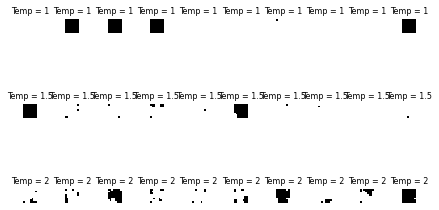

In [12]:
from matplotlib import pyplot as plt

temps = [1, 1.5, 2]
size = 8
images_num = 10

for row,temp in enumerate(temps):
    P = get_Ps(size, temp)
    for num in range(images_num):
        Y = sample_ys(size, P).astype(int)
        
        image = []
        # image is 1D array of size =size, need to convert back to 2D image using y2row
        for i in range(size):
            x = y2row(Y[i], width=size)
            image.append(x)
        image = np.asarray(image)
        # print(image)

        #plot all the images in one figure, all the same temps in one row, set border to image to be on, -1 as white and 1 as black
        plt.subplot(len(temps), images_num, row * images_num + num + 1)
        plt.imshow(image, cmap='gray', vmin=-1, vmax=1,interpolation='None')
        plt.axis('off')
        plt.title('Temp = {}'.format(temp), fontsize=8)



plt.tight_layout()
plt.show()
 

Computer Exercise 8 Using the three samplers you implemented above, at
each of the three temperatures, draw 10,000 samples, x(1), . . . , x(10000) (each
such sample is an 8 × 8 binary image) and compute two empirical expectations:
EbTemp(X(1,1)X(2,2)) ,
1
10000
10000
X
n=1
x(1,1)(n)x(2,2)(n) (13)
EbTemp(X(1,1)X(8,8)) ,
1
10000
10000
X
n=1
x(1,1)(n)x(8,8)(n) (14)

where Temp = 1, 1.5, and 2 and where x(i,j)(n) is the value at the (i, j)-th
lattice site of sample n. To help you debug here are the values you should get
for Temp = 1: EbTemp(X(1,1)X(2,2)) ≈ 0.95; EbTemp(X(1,1)X(8,8)) ≈ 0.9.

In [13]:
# computer exercise 8
#need to run with 10000

from tqdm import tqdm

num_samples = 1000
size = 8
temps = [1, 1.5, 2]

expectation_dict = {}

for row,temp in enumerate(temps):
    data = []
    P = get_Ps(size, temp)
    for num in tqdm(range(num_samples)):
        Y = sample_ys(size, P).astype(int)
        image = []
        # image is 1D array of size =size, need to convert back to 2D image using y2row
        for i in range(size):
            x = y2row(Y[i], width=size)
            image.append(x)
        image = np.asarray(image).astype(np.int8)
        # print(image)
        data.append(image)

    #calculate the expectation 
    E12 = np.sum([data[i][0,0]*data[i][1,1] for i in range(num_samples)]) / num_samples
    E18 = np.sum([data[i][0,0]*data[i][7,7] for i in range(num_samples)]) / num_samples
    print("E12 = ", E12)
    print("E18 = ", E18)

    expectation_dict[temp] = [E12, E18]


print(expectation_dict)

        
    
    

100%|██████████| 1000/1000 [00:49<00:00, 20.16it/s]


E12 =  0.95
E18 =  0.904


100%|██████████| 1000/1000 [00:51<00:00, 19.47it/s]


E12 =  0.782
E18 =  0.594


100%|██████████| 1000/1000 [00:47<00:00, 20.90it/s]

E12 =  0.51
E18 =  0.074
{1: [0.95, 0.904], 1.5: [0.782, 0.594], 2: [0.51, 0.074]}
